In [150]:
import numpy as np
from sklearn.metrics.pairwise import polynomial_kernel as polykernel
from sklearn.metrics.pairwise import rbf_kernel as rbf
from matplotlib import pyplot as plt


In [14]:
data1=[]
label1=[]
data2=[]
label2=[]
with open('data1.txt','r') as f:
    for row in f:
        rowlist=row.strip().split(' ')
        if(len(rowlist)>1):
            data1.append([int(rowlist[0]),int(rowlist[1])])
            label1.append(int(rowlist[2]))
with open('data2.txt','r') as f:
    for row in f:
        rowlist=row.strip().split(' ')
        if(len(rowlist)>1):
            data2.append([int(rowlist[0]),int(rowlist[1])])
            label2.append(int(rowlist[2]))

In [4]:
data=data1+data2
label=label1+label2

In [5]:
from sklearn.utils import shuffle

In [6]:
def kernel(x):
    global w
    return np.dot(w,x)

def getpred(w,b,x):
    phi=[x[0],x[1],x[0]**2,x[1]**2,x[0]*x[1]]
    if(b+np.dot(w,phi)>0):
        return 1
    else:
        return 0

In [7]:
def perceptron(data,label):
    global b,w
    convergence=False
    itn=0
    while(convergence!=True):
        itn+=1
        print(itn)
        data,label=shuffle(data,label)
        convergence=True
        #print(w)
        mispredcount=0
        for row,y in zip(data,label):
            #print(row)
            #print(y)
            x=[row[0],row[1],row[0]**2,row[1]**2,row[0]*row[1]]
            pred=b+kernel(x)
            if(y*pred<=0):
                mispredcount+=1
                convergence=False
                w_update=[y*i for i in x]
                #print('w_update')
                w=[i+j for i,j in zip(w,w_update)]
                b=b+y
        print('mispredcount',mispredcount)
    return w,b

In [ ]:
w=[0,0,0,0,0]
b=0
perceptron(data1,label1)

In [8]:
w_data1=w
b_data1=b

In [ ]:
w=[0,0,0,0,0]
b=0
perceptron(data2,label2)

In [25]:
w_data2,b_data2=w,b

In [ ]:
b_data2

In [26]:
w_data2

[-3884, 1060, 496, -34, -151]

In [27]:
b_data1

90

In [28]:
w_data1

[203, 210, 145, 166, -428]

In [12]:
clrDict1={'cl0':[],'cl1':[]}  
clrDict2={'cl0':[],'cl1':[]}  


for x in range(0,240):
    for y in range(0,240):
        clrDict1['cl'+str(getpred(w_data1,b_data1,[x/20,y/20]))].append((x/20,y/20))
        clrDict2['cl'+str(getpred(w_data2,b_data2,[x/20,y/20]))].append((x/20,y/20))

In [13]:
from matplotlib import pyplot as plt

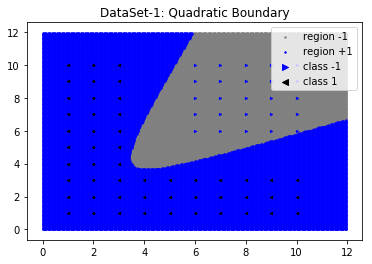

In [24]:
plt.scatter([y[1] for y in clrDict1['cl0']],[x[0] for x in clrDict1['cl0']],c='grey',s=2,label='region -1')
plt.scatter([y[1] for y in clrDict1['cl1']],[x[0] for x in clrDict1['cl1']],c='blue',s=2,label='region +1')
for row,y in zip(data1,label1):
    if(y==-1):
        plt.scatter(row[1],row[0],marker=">",s=5,c='blue')
    if(y==1):
        plt.scatter(row[1],row[0],marker="<",s=5,c='black')
plt.scatter([],[],marker=">",c='blue',label='class -1')
plt.scatter([],[],marker="<",c='black',label='class 1')
plt.legend()
plt.title('DataSet-1: Quadratic Boundary')
plt.show()

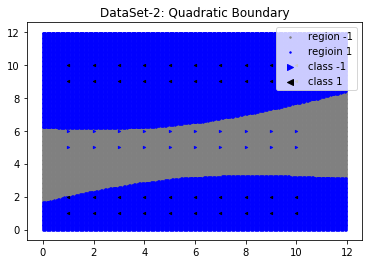

In [22]:
plt.scatter([y[1] for y in clrDict2['cl0']],[x[0] for x in clrDict2['cl0']],c='grey',s=2,label='region -1')
plt.scatter([y[1] for y in clrDict2['cl1']],[x[0] for x in clrDict2['cl1']],c='blue',s=2,label='regioin 1')
for row,y in zip(data2,label2):
    if(y==-1):
        plt.scatter(row[1],row[0],marker=">",s=5,c='blue')
    if(y==1):
        plt.scatter(row[1],row[0],marker="<",s=5,c='black')
plt.scatter([],[],marker=">",c='blue',label='class -1')
plt.scatter([],[],marker="<",c='black',label='class 1')
plt.legend()
plt.title('DataSet-2: Quadratic Boundary')
plt.show()

In [183]:
####data1 and data2 are available.####
data1,label1=shuffle(data2,label2)

In [199]:
def kernel(x_i,x_j):
    s=0.1
    #global alpha
    #kval=(1+np.dot(x_i,x_j))**2
    expVal=sum([(i-j)**2 for i,j in zip(x_i,x_j)])
    kval=np.exp(-1*expVal/(s*s))
    return kval
def predict_data1(x):
    global alpha,data1,b
    global label1
    predSum=sum([alpha[i]*label1[i]*kernel(data1[i],x) for i in range(len(data1))])
    if(predSum+b>0):
        return 1
    else:
        return -1
    

In [200]:
alpha=[0]*len(data1)
b=0
allCorrect=False
counter=0
while(allCorrect!=True and counter<5000):
    counter+=1
    if(counter%500==0):
        print(counter)
    allCorrect=True
    for r in range(len(data1)):
        predSum=sum([alpha[i]*label1[i]*kernel(data1[r],data1[i]) for i in range(len(data1))])
        #print(predSum)
        if(label1[r]*(predSum+b)<=0):
            #print('Inside if')
            allCorrect=False
            alpha[r]+=1
            b+=label1[r]
        
    

In [201]:
clrDict1_D={'cl-1':[],'cl1':[]}  
#clrDict2={'cl0':[],'cl1':[]}  

for x in range(0,240):
    for y in range(0,240):
        clrDict1_D['cl'+str(predict_data1([x/20,y/20]))].append((x/20,y/20))
        #clrDict2['cl'+str(getpred(w_data2,b_data2,[x/20,y/20]))].append((x/20,y/20))

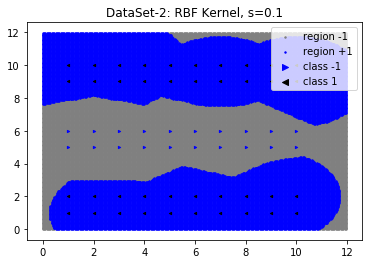

In [203]:
plt.scatter([y[1] for y in clrDict1_D['cl-1']],[x[0] for x in clrDict1_D['cl-1']],c='grey',s=2,label='region -1')
plt.scatter([y[1] for y in clrDict1_D['cl1']],[x[0] for x in clrDict1_D['cl1']],c='blue',s=2,label='region +1')
for row,y in zip(data1,label1):
    if(y==-1):
        plt.scatter(row[1],row[0],marker=">",s=5,c='blue')
    if(y==1):
        plt.scatter(row[1],row[0],marker="<",s=5,c='black')
plt.scatter([],[],marker=">",c='blue',label='class -1')
plt.scatter([],[],marker="<",c='black',label='class 1')
plt.legend()
plt.title('DataSet-2: RBF Kernel, s=0.1')
plt.show()